# 교차 분석

### 문제 1. 
- A 쇼핑몰은 유튜브, 페이스북, 인스타그램 세 소셜 채널에 대해 소셜 마케팅을 하고 있습니다. 기존 패턴에 의하면 페이스북, 인스타그램이 각각 전체 유입의 30%를 담당하고 있었고, 유튜브는 약 40%를 담당하고 있었습니다. 최근 인스타그램으로 유입되는 고객이 증가하는 추세를 보이면서 마케팅 예산안은 개편하려고 합니다. 하지만  채널 담당자들에게 예산 증감은 민감한 사안이기 때문에 보다 과학적인 도구를 통한 근거 마련이 필요해 다음과 같이 일주일간 광고를 통한 유입 고객을 수집해 실제 고객 유입 비가 깨졌는지 확인하려 합니다.

**적합성 검정이란?**
- 적합성 검정은 각 범주에 따른 데이터의 빈도분포가 **이론적으로 기대하는 분포를 따르는지**를 검정하는 방법이다.
- 예시 : 주사위를 굴렸을 때, 각 주사위의 값이 1/6의 확률이 맞는지를 검정

- 귀무가설(H0) : 페이스북, 인스타그램, 유튜브의 비율은 각각 30%, 30%, 40%이다.
- 대립가설(H1) : 페이스북, 인스타그램, 유튜브의 비율은 각각 30%, 30%, 40%라고 할 수 없다.

In [2]:
from scipy.stats import chisquare
import pandas as pd

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.DataFrame({"freq" : [1127, 1248, 1789]}, index = ["페이스북", "인스타그램", "유튜브"])

In [7]:
total = df.sum(axis = 0)

In [13]:
chi = chisquare(df, f_exp = [total*0.3, total*0.3, total*0.4])

In [ ]:
chi

Power_divergenceResult(statistic=array([21.09746238]), pvalue=array([2.62267366e-05]))

pvalue가 0.05보다 작으므로 유의수준 0.05하에서 귀무가설을 기각한다. 따라서, 페이스북, 인스타그램, 유튜브는 각각 전체 유입이 30%, 30%, 40%가 아니며, 실제 고객 유입비가 깨졌다고 할 수 있다.

# 문제 2.
- 아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라
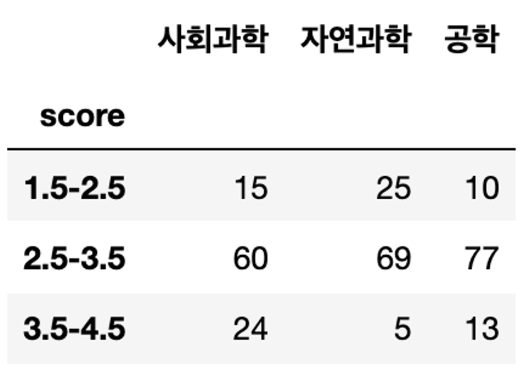

**독립성검정**
- 독립성 검정은 모집단이 두 개의 변수 A, B에 의해 범주화 되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 방법이다.
- 예시 : 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지 검정

- 귀무가설(H0) : 학과와 성적은 관계가 없다.(독립이다.)
- 대립가설(H1) : 학과와 성적은 관계가 있다.(독립이 아니다.)

In [24]:
df2 = pd.DataFrame(
    {"사회과학" : [15, 60 , 24],
     "자연과학" : [25, 69, 5],
     "공학" : [10, 77, 13]
     },
     index = ["1.5~2.5", "2.5~3.5", "3.5~4.5"]
)

In [25]:
df2

,사회과학,자연과학,공학
1.5~2.5,15,25,10
2.5~3.5,60,69,77
3.5~4.5,24,5,13


In [26]:
from scipy.stats import chi2_contingency

chi, p, df, expect = chi2_contingency(df2)

In [18]:
print("Statistic : ", chi)
print("pvalue : ", p)
print("자유도 : ", df)
print("expect : ", expect)

Statistic :  22.136920195949322
pvalue :  0.00018822647762421383
자유도 :  4
expect :  [[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


기댓값은 위의 expect의 값이며 검정 통계량은 약 22.1이다. pvalue값이 0.05보다 작으므로 유의수준 0.05하에서 귀무가설을 기각한다. 따라서 학과와 성적은 독립이 아니라고 결론내릴 수 있다.

### 문제 3.
- 초등학교 1학년 남학생 100명과 여학생 200명을 무작위로 추출하여 TV 프로그램 선호도를 조사하였다. 유의수준 a 0.05하에서 남학생의 TV 프로그램 선호도와 여학생의 TV 프로그램 선호도가 동일한지 검정하여라.

**동질성 검정**
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화 되었을 때, R개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 서로 동일한지를 검정한다.

- 귀무가설(H0) : 남녀 TV 프로그램 선호도가 동일하다.
- 대립가설(H1) : 남녀 TV 프로그램 선호도가 동일하지 않다.

In [19]:
df3 = pd.DataFrame(
    {
        "뽀로로" : [50,50],
        "짱구는 못말려" : [30,80],
        "로봇카 폴리" : [20,70]
    },
    index = ["남학생", "여학생"]
)

In [20]:
df3

,뽀로로,짱구는 못말려,로봇카 폴리
남학생,50,30,20
여학생,50,80,70


In [21]:
chi2, p2, df2, expect2 = chi2_contingency(df3)

In [28]:
chi2_contingency(df3)

Chi2ContingencyResult(statistic=19.318181818181817, pvalue=6.384253422581756e-05, dof=2, expected_freq=array([[33.33333333, 36.66666667, 30.        ],
       [66.66666667, 73.33333333, 60.        ]]))

In [22]:
print("pvalue : ", p2)

pvalue :  6.384253422581756e-05


유의확률이 유의수준 0.05보다 작은 값을 가지므로 귀무가설을 기각한다. 따라서 남녀 TV 프로그램 선호도가 동일하지 않다.